----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


----

# # <span style="color:#0b486b">Assignment One: Mastering Machine Learning Process</span>
### <span style="color:#0b486b">Due: 11:59 pm 18 August 2019 (Sunday)</span>

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for you to complete Assignment 1. Some sections have been partially completed to help you get started. **The total marks for this notebook are 80 marks, which will be re-scaled to 25 marks in the grade.** 

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset **[10 points]**
* Part 2: Build Model Intuition: What Works and What doesn't **[57 points]**
* Part 3: Outlier/Anomaly Detection Survey: Write a Report to summarize at least 5 effective outlier/anomaly detection models and approaches published in recent 5 years **[13 points]**


**Hint**: this assignment was essentially designed based on the first three lectures and practical lab sessions. You are strongly recommended to go through these contents thoroughly which might help you complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]\_assignment1\_solution.ipynb**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]\_assingment1\_output.html**</span>: **this is the output of your Python notebook solution *exported* in HTML format**.
1.	<span style="color:red">**[YourID]\_assingment1\_report.doc**</span>: **this is the report of your outlier detection survey work**.

For example, if your student ID is: 123456, you will then need to submit two files:
* 123456_assignment1_solution.ipynb
* 123456_assignment1_output.html
* 123456_assignment1_Report.doc

<span style="color:red">Now, please proceed to content below to complete your assignment!</span>

---

## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 10 points]**.<span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

**todo**
* Normalise before pca
* update datapoints


---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [1]:
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
# append your own importing packages here if needed

In [2]:
CSS = """
div.cell:nth-child(50) .output {
    flex-direction: row;
}
"""

In [3]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the Anaconda prompt.

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

 Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\memory.py", line 524, in _cached_call
    verbose=self._verbose)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\memory.py", line 137, in _load_output
    result = numpy_pickle.load(filename, mmap_mode=mmap_mode)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py", line 578, in load
    obj = _unpickle(fobj, filename, mmap_mode)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py", line 508, in _unpickle
    obj = unpickler.load()
  File "C:\ProgramData\Anaconda3\lib\pickle.py", line 1050, in load
    dispatch[key[0]](self)
  File "C:\ProgramData\Anaconda3\lib\pickle.py", line 1338, in load_global
    klass = self.find_class(module, name)
  File "C:\ProgramData\Anaconda3\lib\pickle.py", line 1388, in find_class
    __import__(module, level=0)
ModuleNotFoundError: No mo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(fa

In [5]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target
X.shape
y.shape

(1348,)

---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red">**Question 1.1**</span>. Print out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red">**[0.5 points]**</span></div>

In [6]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces.DESCR)

LFW faces dataset


####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red">**[1.5 points]**</span></div> 

In [7]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"total number of data points: {len(faces.target)}")
# Student can use different field such as data, images target_names to get the number of data points 

total number of data points: 1348


####  <span style="color:red">**Question 1.3**</span>. Each class (or label) in this dataset corresponds to a public figure. Print out the number of classes, and the corresponding person name for each class. Print out 50 photos of *Ariel Sharon* and 50 photos of *Hugo Chavez*. You might decide to use the function `display_faces` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [8]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)
print(f"total number of unique classes: {len(class_ids)}\nonly 8, since the restriction was, that minimal 60 pictures/classes are available\n")

# [insert your code here]

print("number of classes:\t\tclass \tcorresponding person:")
print("-"*100)
for i in range(len(class_ids)):
    x = faces.target[faces.target == i]
    print(f"{len(x)} \t\t\t\t{i}\t{faces.target_names[i]}")
    # [insert your code here]


total number of unique classes: 8
only 8, since the restriction was, that minimal 60 pictures/classes are available

number of classes:		class 	corresponding person:
----------------------------------------------------------------------------------------------------
77 				0	Ariel Sharon
236 				1	Colin Powell
121 				2	Donald Rumsfeld
530 				3	George W Bush
109 				4	Gerhard Schroeder
71 				5	Hugo Chavez
60 				6	Junichiro Koizumi
144 				7	Tony Blair


Ariel Sharon:


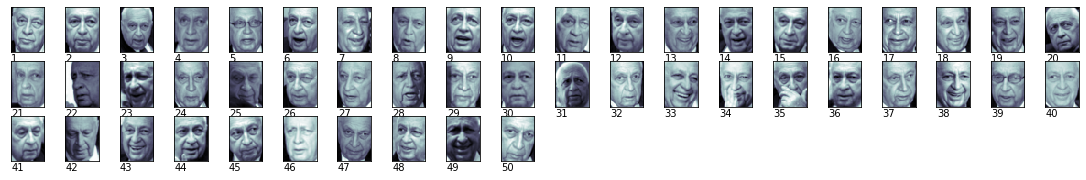

In [9]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# this function is a utility to display face images from the dataset
# here it's imported again to modify
%matplotlib inline  

def display_faces(images, label, num2display,label_nmr):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)
    print(faces.target_names[label_nmr]+":")

    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
#        p.text(0, 14, str(label[i])) removed this line of code, since i caused troubles and is only for text
        p.text(0, 60, str(i+1)) # added +1 to acutally visualise the number


images_sharon = faces.images        
type(images_sharon)
type(faces)
# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

# Ariel Sharon:
display_faces(faces.images[np.where(faces.target==0)],faces.target_names[0], 50,0)

Hugo Chavez:


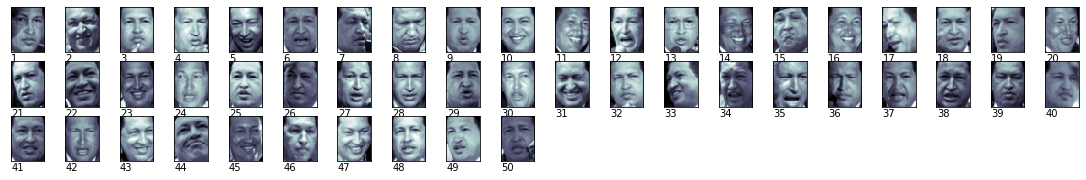

In [10]:
# Hugo Chavez
display_faces(faces.images[np.where(faces.target==5)],faces.target_names[0], 50,5)

####  <span style="color:red">**Question 1.4**</span>. Given our problem of interest is face recognition, should we choose supervised or unsupervised machine learning methods? Explain why and list at least four ML algorithms that are suitable for this problem.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

##### Use this markdown cell to write your answer to this question.

Given this dataset, supervised machine learning methods are appropriate. The reason is that we have labelled data. That means that the datas target value is defined. In this case we have the names of the persons we want to identify for each picture. The task is therefore to correctly identify newly data to this. 

This case is defined as a classical classification problem. We have different names (classes) to identify. For this tasks many algortihms are suitable. For example:  
* **Logistic Regression**
* **Linear Discriminant Analysis (LDA)**   
* **Support Vector Machine (SVM)**
* **Decision Tree**
* **Random Forest**
* **Gradient Boosting**
* **...**

####  <span style="color:red">**Question 1.5**</span>. create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [11]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import train_test_split # improt split module

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape,X_test.shape) # to see if it worked properly  

(1078, 1850) (270, 1850)


---

### <span style="color:#0b486b">Part 2: Build Model  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$, where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  <span style="color:red">**Question 2.1**</span>. Use a *single split-train approach* and *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

The total marks for this question are <span style="color:red">**[34 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to use PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# remark: In my opinion, the pca transformation should only be done after the train/test split and only on the train data.
# Then the transformation should be applied to the test data. Otherwise the test data influence the training process via the pca.

pca = decomposition.PCA(n_components=20)
pca.fit(X)
pca_X = pca.transform(X)

# additionally printing out the explained variance by component
print(pca.explained_variance_ratio_)
print(pca_X.shape) # see if 20 components

[0.19203994 0.14870343 0.07238917 0.06140729 0.0513045  0.02960071
 0.02492064 0.02061594 0.01989941 0.01911936 0.01577929 0.01480205
 0.012186   0.01105707 0.01050181 0.00976867 0.00912405 0.00884324
 0.00816358 0.00704187]
(1348, 20)


#### <span style="color:red">**(b)**</span> **Use the reduced dimension features pca_X obtained in previous steps to write your code to show the performance (recall, precision, accuracy, F-score) using *Logistic Regression* as the classifier and a single train-split with 40% of data will be used for testing and the rest for training.**
<div style="text-align: right"> <span style="color:red">**[4 points]**</span> </div>

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# [insert your codes here]
# split the pca_X data
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.4, random_state=123)

# fit the regression
fit_log = LogisticRegression(random_state=123, solver='lbfgs', max_iter = 50000,
                         multi_class='multinomial').fit(X_train, y_train)

# predict on test data
y_predict = fit_log.predict(X_test)

# print the classification report
print(classification_report(y_test, y_predict))         

# # the confusion matrix
# print("-"*100)
# print("Confusion Matrix")
# print(confusion_matrix(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.44      0.23      0.30        35
          1       0.60      0.66      0.63        93
          2       0.67      0.57      0.62        54
          3       0.73      0.81      0.77       207
          4       0.31      0.24      0.27        46
          5       0.58      0.56      0.57        27
          6       0.68      0.81      0.74        21
          7       0.38      0.39      0.38        57

avg / total       0.60      0.62      0.60       540



In [17]:
y_train[1]

5

<span style="color:red">**(c)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [14]:
###### YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


# it is not really clear whether for each class the metrics report is required or just the average...
# So i do it for both, each class and the average metrics

# prepare for splitting
rs = ShuffleSplit(n_splits=10, test_size=.4, random_state=123)
rs.get_n_splits(pca_X)
rs.split(pca_X)




# prepare a list that later will be turned into a dataframe for the evaluation metrics
# for the average metrics each time and accuracy 
metrics = [] 
# list with metrics for each class
metrics_class = [[] for _ in range(8)]

for train_index, test_index in rs.split(pca_X): #do the for loop with each split
    fit_log = LogisticRegression(random_state=123, solver='lbfgs', max_iter = 50000, 
                         multi_class='multinomial').fit(pca_X[train_index], y[train_index])
                         #fit the regression - specifiy multinomial and increase the iteration to converge. 
    y_predict = fit_log.predict(pca_X[test_index]) # predict on the test data
    report = classification_report(y[test_index], y_predict,output_dict = True) #extract the calssification report as dictionary
    report_filtered = report["weighted avg"] #take the weighted average for the different classes. It was not asked to do it for
    # each class individually 
    report_filtered["accuracy"]=report["accuracy"] #add the accuracy
    metrics.append(report_filtered)
    # each class individually
    for index,dic in enumerate(metrics_class):
        dic.append(report[str(index)])
        
        

# evaluation metrics for each class (without accuracy)
for index,dic in enumerate(metrics_class):
    dic_df = pd.DataFrame(dic)
    dic_df = dic_df.drop(columns="support")
    print(f"Evaluation Metrics for Class {index}")
    display(dic_df.describe()[1:3])
    
# evaluation metrics averages 
#turn the list into a DataFrame and describe the metrics
metricsss_df = pd.DataFrame(metrics)
metricsss_df = metricsss_df.drop(columns="support")
print(f"Evaluation Metrics for Averaged Metrics and Accuracy")
display(metricsss_df.describe()[1:3])
    

Evaluation Metrics for Class 0


,precision,recall,f1-score
mean,0.437607,0.364497,0.391423
std,0.074407,0.071429,0.053427


Evaluation Metrics for Class 1


,precision,recall,f1-score
mean,0.640037,0.637334,0.637423
std,0.053037,0.023767,0.027300


Evaluation Metrics for Class 2


,precision,recall,f1-score
mean,0.677348,0.602446,0.634369
std,0.053118,0.065649,0.034097


Evaluation Metrics for Class 3


,precision,recall,f1-score
mean,0.720006,0.816424,0.764925
std,0.022583,0.022889,0.017125


Evaluation Metrics for Class 4


,precision,recall,f1-score
mean,0.380340,0.262338,0.307547
std,0.086505,0.048742,0.053919


Evaluation Metrics for Class 5


,precision,recall,f1-score
mean,0.541561,0.529788,0.530318
std,0.053506,0.093678,0.050443


Evaluation Metrics for Class 6


,precision,recall,f1-score
mean,0.702956,0.725786,0.709190
std,0.112558,0.084270,0.078693


Evaluation Metrics for Class 7


,precision,recall,f1-score
mean,0.486873,0.447395,0.464335
std,0.086625,0.069068,0.070644


Evaluation Metrics for Averaged Metrics and Accuracy


,precision,recall,f1-score,accuracy
mean,0.625176,0.634444,0.625138,0.634444
std,0.016479,0.017156,0.016828,0.017156


<span style="color:red">**(d)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# Not really clear what is asked. Show the score for each split or overall? 
# done as above:


# 10 fold cross-validation
kf = KFold(n_splits=10)
kf.get_n_splits(pca_X)
metrics = [] 
metrics_class = [[] for _ in range(8)]

# loop through to fit each split
for train_index, test_index in kf.split(pca_X):
    fit_log = LogisticRegression(random_state=123, solver='lbfgs', max_iter = 50000,
                         multi_class='multinomial').fit(pca_X[train_index], y[train_index])
    y_predict = fit_log.predict(pca_X[test_index])
    report = classification_report(y[test_index], y_predict,output_dict = True) #extract the classification report as dictionary
    report_filtered = report["weighted avg"] #take the weighted average for the different classes. It was not asked to do it for
    # each class individually 
    report_filtered["accuracy"]=report["accuracy"] #add the accuracy
    metrics.append(report_filtered)
    for index,dic in enumerate(metrics_class):
        dic.append(report[str(index)])
    
    
    
# evaluation metrics for each class (without accuracy)
for index,dic in enumerate(metrics_class):
    dic_df = pd.DataFrame(dic)
    dic_df = dic_df.drop(columns="support")
    print(f"Evaluation Metrics for Class {index}")
    display(dic_df.describe()[1:3])

    
# evaluation metrics averages     
#turn the list into a dictionary and describe the metrics
metricscv_df = pd.DataFrame(metrics)
metricscv_df = metricscv_df.drop(columns="support")
print(f"Evaluation Metrics for Averaged Metrics and Accuracy")
display(metricscv_df.describe()[1:3])
    


Evaluation Metrics for Class 0


,precision,recall,f1-score
mean,0.527500,0.327835,0.380317
std,0.258439,0.172499,0.175488


Evaluation Metrics for Class 1


,precision,recall,f1-score
mean,0.604521,0.631312,0.613503
std,0.085303,0.085704,0.069705


Evaluation Metrics for Class 2


,precision,recall,f1-score
mean,0.621580,0.607276,0.599590
std,0.151881,0.173627,0.138654


Evaluation Metrics for Class 3


,precision,recall,f1-score
mean,0.716942,0.818859,0.763697
std,0.059239,0.039393,0.046119


Evaluation Metrics for Class 4


,precision,recall,f1-score
mean,0.385093,0.282218,0.318388
std,0.218993,0.167275,0.184342


Evaluation Metrics for Class 5


,precision,recall,f1-score
mean,0.548341,0.522421,0.520156
std,0.174739,0.183901,0.153222


Evaluation Metrics for Class 6


,precision,recall,f1-score
mean,0.746934,0.750833,0.728912
std,0.125326,0.203156,0.118168


Evaluation Metrics for Class 7


,precision,recall,f1-score
mean,0.536536,0.461000,0.482636
std,0.156823,0.152566,0.126009


Evaluation Metrics for Averaged Metrics and Accuracy


,precision,recall,f1-score,accuracy
mean,0.637934,0.638076,0.626426,0.638076
std,0.045487,0.045075,0.044064,0.045075


<span style="color:red">**(e)**</span> **Preparing a table to summarize the performances obtained from step (c) and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

,precision,recall,f1-score,accuracy,Split
mean,0.625176,0.634444,0.625138,0.634444,Shufflesplit
std,0.016479,0.017156,0.016828,0.017156,Shufflesplit
mean,0.637934,0.638076,0.626426,0.638076,Cross-Validation
std,0.045487,0.045075,0.044064,0.045075,Cross-Validation


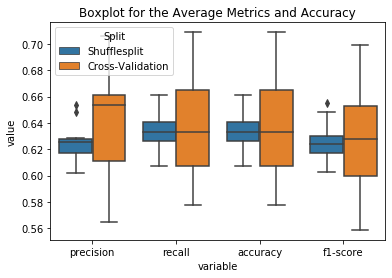

In [16]:
# add column split
metricsss_df["Split"]="Shufflesplit"
metricscv_df["Split"] = "Cross-Validation"


# create one df with the metrics
metrics_table_ss = metricsss_df.describe()[1:3]
metrics_table_ss["Split"]="Shufflesplit"
metricscv_table_df = metricscv_df.describe()[1:3]
metricscv_table_df["Split"]="Cross-Validation"

# concat it together
metrics_table_summary = pd.concat([metrics_table_ss,metricscv_table_df])
display(metrics_table_summary)

# prepare for a boxplot 
metrics = pd.concat([metricsss_df,metricscv_df])
metrics_long = pd.melt(metrics, id_vars=['Split'], value_vars=['precision',"recall","accuracy","f1-score"])   

# plot
sns.boxplot(x="variable", y="value", data=metrics_long,hue = "Split").set_title("Boxplot for the Average Metrics and Accuracy")
plt.show()

### Conclusion of the Comparison 

As seen in the standard deviation in the table and visually in the boxplot a major discreptancy exists. This is due to the fact that the two functions (Shuffle Split and Cross-Validation) generate indices via two dissimilar mechanisms. The shuffle split randomly takes a sample from the data at each split time. Repetitions are therefore likely. K-Fold, on the other hand, splits the dataset into k distinct and equally large pieces. So with the cross-validation, there is a higher variability between the splits which leads to a larger standard deviation. However, observing the mean value, the values do not differ that much anymore.

<span style="color:red">**Question 2.2.**</span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red">**[23 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# I encountered convergence problems while running the linearSVM. 
# A Solution for this matter would be a normalization. After doing it, the problems are gone
# Note to myself: it is important to do the normalization before pca transformation
# to see what the influence of the normalization is, I do the following models with both, normalized and unnormalized data.

from sklearn.svm import LinearSVC
X_normalize = normalize(X)
accuracy = ml_algorithm_screening_face(X=X_normalize,
                            y=y,
                            model= svm.LinearSVC(loss = "hinge"),
                            model_name="linear_svm",
                            scoring_metrics="accuracy", 
                            pca_dim=20,
                            n_runs=10)
print(f"The accuracy mean (normalized) is: {accuracy.mean()}")
print(f"The standard deviation (normalized) is:{accuracy.std()}")

accuracy = ml_algorithm_screening_face(X=X,
                            y=y,
                            model= svm.LinearSVC(loss = "hinge"),
                            model_name="linear_svm",
                            scoring_metrics="accuracy", 
                            pca_dim=20,
                            n_runs=10)
print(f"The accuracy mean is: {accuracy.mean()}")
print(f"The standard deviation is:{accuracy.std()}")



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The accuracy mean (normalized) is: 0.4843891652846876
The standard deviation (normalized) is:0.04688395753457244
The accuracy mean is: 0.37095080154781646
The standard deviation is:0.042198209343971047


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


<span style="color:red">**(b)**</span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[15 points]**<span> </div>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	10
Accuracy for each run:	[0.47407407 0.41481481 0.4        0.45185185 0.45185185 0.38518519
 0.45925926 0.51111111 0.42537313 0.41791045]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	20
Accuracy for each run:	[0.56296296 0.48148148 0.40740741 0.5037037  0.48888889 0.43703704
 0.5037037  0.53333333 0.5        0.43283582]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	30
Accuracy for each run:	[0.62222222 0.51111111 0.4962963  0.51851852 0.56296296 0.46666667
 0.54074074 0.57777778 0.55970149 0.54477612]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	40
Accuracy for each run:	[0.62962963 0.53333333 0.54074074 0.52592593 0.60740741 0.5037037
 0.55555556 0.57777778 0.55970149 0.55970149]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	50
Accuracy for each run:	[0.65925926 0.55555556 0.56296296 0.54074074 0.59259259 0.51111111
 0.56296296 0.59259259 0.58208955 0.54477612]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	60
Accuracy for each run:	[0.66666667 0.55555556 0.57037037 0.56296296 0.6        0.51851852
 0.56296296 0.6        0.60447761 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	70
Accuracy for each run:	[0.67407407 0.54074074 0.56296296 0.57037037 0.61481481 0.54074074
 0.57037037 0.61481481 0.60447761 0.56716418]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	80
Accuracy for each run:	[0.67407407 0.54074074 0.58518519 0.56296296 0.61481481 0.52592593
 0.58518519 0.61481481 0.60447761 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	90
Accuracy for each run:	[0.67407407 0.54074074 0.59259259 0.56296296 0.62222222 0.54074074
 0.57037037 0.61481481 0.61940299 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	100
Accuracy for each run:	[0.67407407 0.54074074 0.58518519 0.57777778 0.61481481 0.54814815
 0.57777778 0.61481481 0.61940299 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	110
Accuracy for each run:	[0.67407407 0.55555556 0.58518519 0.57037037 0.61481481 0.54814815
 0.57777778 0.61481481 0.62686567 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	120
Accuracy for each run:	[0.67407407 0.54814815 0.59259259 0.57777778 0.62222222 0.54074074
 0.57777778 0.61481481 0.62686567 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	130
Accuracy for each run:	[0.67407407 0.55555556 0.6        0.57777778 0.61481481 0.54074074
 0.58518519 0.61481481 0.61940299 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	140
Accuracy for each run:	[0.67407407 0.54814815 0.60740741 0.58518519 0.61481481 0.54074074
 0.58518519 0.62222222 0.62686567 0.56716418]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	150
Accuracy for each run:	[0.67407407 0.54814815 0.60740741 0.57777778 0.61481481 0.55555556
 0.58518519 0.62222222 0.61940299 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	160
Accuracy for each run:	[0.67407407 0.54814815 0.6        0.58518519 0.61481481 0.55555556
 0.57777778 0.62222222 0.61940299 0.56716418]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	170
Accuracy for each run:	[0.67407407 0.54814815 0.60740741 0.59259259 0.61481481 0.55555556
 0.58518519 0.62222222 0.6119403  0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	180
Accuracy for each run:	[0.67407407 0.54814815 0.6        0.59259259 0.61481481 0.56296296
 0.58518519 0.62222222 0.6119403  0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	190
Accuracy for each run:	[0.67407407 0.55555556 0.60740741 0.58518519 0.61481481 0.57037037
 0.58518519 0.62222222 0.60447761 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Number of Components:	200
Accuracy for each run:	[0.67407407 0.55555556 0.6        0.58518519 0.62222222 0.56296296
 0.58518519 0.62222222 0.60447761 0.57462687]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	10
Accuracy for each run:	[0.2        0.22222222 0.28148148 0.21481481 0.24444444 0.32592593
 0.27407407 0.16296296 0.3358209  0.25373134]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	20
Accuracy for each run:	[0.40740741 0.31851852 0.44444444 0.28148148 0.48148148 0.3037037
 0.28148148 0.46666667 0.3880597  0.41044776]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	30
Accuracy for each run:	[0.36296296 0.40740741 0.40740741 0.36296296 0.42222222 0.47407407
 0.47407407 0.48148148 0.31343284 0.41791045]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	40
Accuracy for each run:	[0.46666667 0.44444444 0.48888889 0.44444444 0.54814815 0.42962963
 0.42962963 0.52592593 0.52985075 0.46268657]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	50
Accuracy for each run:	[0.44444444 0.47407407 0.55555556 0.52592593 0.51851852 0.54814815
 0.45925926 0.46666667 0.49253731 0.48507463]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	60
Accuracy for each run:	[0.45185185 0.46666667 0.55555556 0.51851852 0.54074074 0.53333333
 0.56296296 0.53333333 0.53731343 0.67164179]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	70
Accuracy for each run:	[0.55555556 0.5037037  0.59259259 0.51851852 0.63703704 0.60740741
 0.58518519 0.51851852 0.59701493 0.61940299]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	80
Accuracy for each run:	[0.6        0.5037037  0.59259259 0.48888889 0.59259259 0.51111111
 0.61481481 0.55555556 0.6119403  0.61940299]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	90
Accuracy for each run:	[0.54074074 0.60740741 0.55555556 0.54814815 0.59259259 0.61481481
 0.57037037 0.5037037  0.60447761 0.55223881]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	100
Accuracy for each run:	[0.48888889 0.48148148 0.66666667 0.60740741 0.65925926 0.64444444
 0.57037037 0.61481481 0.60447761 0.6641791 ]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	110
Accuracy for each run:	[0.61481481 0.54074074 0.63703704 0.47407407 0.60740741 0.60740741
 0.63703704 0.67407407 0.61940299 0.67164179]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	120
Accuracy for each run:	[0.61481481 0.6        0.53333333 0.57777778 0.6962963  0.52592593
 0.6        0.65185185 0.57462687 0.58955224]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	130
Accuracy for each run:	[0.60740741 0.57777778 0.62222222 0.54074074 0.65925926 0.63703704
 0.62962963 0.60740741 0.6119403  0.69402985]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	140
Accuracy for each run:	[0.61481481 0.4962963  0.65185185 0.58518519 0.7037037  0.6
 0.63703704 0.65185185 0.68656716 0.68656716]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	150
Accuracy for each run:	[0.68148148 0.59259259 0.65925926 0.56296296 0.65925926 0.68148148
 0.62962963 0.68888889 0.64179104 0.58208955]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	160
Accuracy for each run:	[0.62962963 0.60740741 0.68888889 0.62222222 0.65185185 0.68888889
 0.63703704 0.56296296 0.68656716 0.65671642]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	170
Accuracy for each run:	[0.63703704 0.55555556 0.65185185 0.68148148 0.77777778 0.6962963
 0.68888889 0.64444444 0.67164179 0.64925373]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	180
Accuracy for each run:	[0.58518519 0.62962963 0.63703704 0.65925926 0.6962963  0.67407407
 0.7037037  0.71111111 0.56716418 0.6119403 ]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Unnormalized
Number of Components:	190
Accuracy for each run:	[0.7037037  0.55555556 0.64444444 0.6        0.74074074 0.63703704
 0.68148148 0.68888889 0.61940299 0.67164179]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.8s finished


Unnormalized
Number of Components:	200
Accuracy for each run:	[0.73333333 0.60740741 0.64444444 0.63703704 0.68888889 0.62222222
 0.61481481 0.66666667 0.64925373 0.67164179]


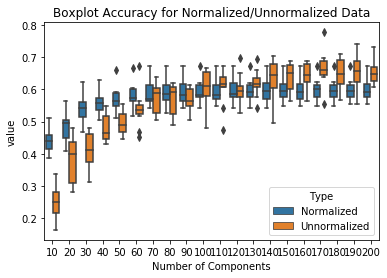

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# one for the normalized data
di_normalized = {}

for i in range(10,210,10):
    results = []
    accuracy = ml_algorithm_screening_face(X=X_normalize,
                            y=y,
                            model= svm.LinearSVC(loss = "hinge"),
                            model_name="linear_svm",
                            scoring_metrics="accuracy", 
                            pca_dim=i,
                            n_runs=10)
    print(f"Number of Components:\t{i}\nAccuracy for each run:\t{accuracy}")
    di_normalized[str(i)]=accuracy
# one for the unnormalized data
di_unnormalized = {}

for i in range(10,210,10): #I increased the number of components to look at, since the results still varied
    results = []
    accuracy = ml_algorithm_screening_face(X=X,
                            y=y,
                            model= svm.LinearSVC(loss = "hinge"),
                            model_name="linear_svm",
                            scoring_metrics="accuracy", 
                            pca_dim=i,
                            n_runs=10)
    print(f"Unnormalized\nNumber of Components:\t{i}\nAccuracy for each run:\t{accuracy}")
    di_unnormalized[str(i)]=accuracy

    
# [insert your code here]
df_acc_s = pd.DataFrame(data = di_normalized)
df_acc_s["Type"]="Normalized"
df_acc_u = pd.DataFrame(data = di_unnormalized)
df_acc_u["Type"]="Unnormalized"

df_acc = pd.concat([df_acc_s,df_acc_u])

metrics_long = pd.melt(df_acc, id_vars=['Type'], value_vars=["10","20","30","40","50","60","70","80","90","100","110","120","130",
                                                             "140","150","160","170","180","190","200"]) 

metrics_long["Number of Components"] = metrics_long["variable"].astype(int)
metrics_long = metrics_long.drop("variable",axis  =1)
sns.boxplot(x="Number of Components", y="value", data=metrics_long,hue = "Type").set_title("Boxplot Accuracy for Normalized/Unnormalized Data")
plt.show()

In [20]:
val = df_acc_u.mean().max()
com = df_acc_u.mean().idxmax()
print(f"Highest Accuracy Unnormalized\nNumber of Components:\t{com}\nValue:\t\t\t{val}")

print("-"*100)
val = df_acc_s.mean().max()
com = df_acc_s.mean().idxmax()
print(f"Highest Accuracy Normalized\nNumber of Components:\t{com}\nValue:\t\t\t{val}")

# As can be seen in the boxplot and the results here, the  accuracy of the model with normalized data is with lower number
# of components larger, whereas when the number of components increases, the accuracy of model with unnormalized data increases
# as well. This might be due to the nonconvergence problem. However, this issue is not to be discussed in this assignment.

# Also the results vary since no seed was set.

Highest Accuracy Unnormalized
Number of Components:	170
Value:			0.6654228855721394
----------------------------------------------------------------------------------------------------
Highest Accuracy Normalized
Number of Components:	190
Value:			0.5993919292426755


### <span style="color:#0b486b">Part 3: Outlier Detection Survey  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 13 points]**.<span></div>

You are required to read at least 5 papers relating to outlier detection in the recent 5 years. It will help gain a good understanding how/when to use outlier detection models, how these models work in different datasets. The report needs to include the below points:
- Explain why you choose the five models with at least 0.5 A4 Page at the begining of the report; <span style="color:red">**[3 points]**.</span>
- For each model, you need to do <span style="color:red">**[2 points per model]**.</span>
    - at least 5 outlier detection models with the reference information where the model is published;
    - write 0.5 A4 Page for each model;
    - summarize the full strengths and weakness of each model by clearly presenting the evidence from the experiments declared in their original papers; 
    - Evaluation metrics and available datasets used for each model.

One example report looks like "On the Evaluation of Unsupervised Outlier Detection: Measures, Datasets, and an Empirical Study
by G. O. Campos, A. Zimek, J. Sander, R. J. G. B. Campello, B. Micenková, E. Schubert, I. Assent and M. E. Houle
Data Mining and Knowledge Discovery 30(4): 891-927, 2016, DOI: 10.1007/s10618-015-0444-8". https://link.springer.com/article/10.1007%2Fs10618-015-0444-8.

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>